*Presentado por: Gina Maritza Martínez López*


El objetivo del proyecto es comparar el desempeño de diferentes modelos de aprendizaje
automático en un problema de regresión. A saber, la predicción del precio de casas en una
región de Estados Unidos, con base en 12 atributos.

**1. Cargar el dataset HousingData, el cual se proveerá junto con un diccionario de los atributos. La variable objetivo es MEDV.**

In [189]:
#importar paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression #Algoritmo de regresión lineal
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [190]:
#TODO Leer el conjunto de datos y darle el nombre df
df=pd.read_csv("HousingData1.csv")
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,NaN,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


**2. Examinar y realizar una breve descripción de los tipos de variable o cualquier observación que considere pertinente. Remueva filas con valores ausentes si en algún punto lo considera necesario.**

***Diccionario de atributos***

**crim**
Taza de crimen per cápita

**zn**
Proporción de suelo residencial para lotes de más de 25000 pies cuadrados

**indus**
proporción de comercio no minorista

**chas**
¿Limita con el río Charles? 1= sí, 0=no

**nox**
concentración de óxidos de nitrógeno

**rm**
Cantidad promedio de habitaciones por vivienda

**age**
proporción de unidades ocupadas por sus propietarios construidas antes de.

**dis**
media ponderada de las distancias a cinco centros de empleo de Boston

**rad**
índice de accesibilidad a carreteras radiales.

**tax**
tasa de impuesto a la propiedad del valor total

**ptratio**
proporción alumno-docente

**lstat**
porcentaje de status bajo de la población

**medv**
valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.

In [191]:
#TODO5 Remover filas con valores ausentes.
df=df.dropna()
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10,17.5
500,500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33,16.8
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9


In [192]:
df=df.drop(df.columns[[0]], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9


In [193]:
#Explorar el dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  LSTAT    394 non-null    float64
 12  MEDV     394 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 43.1 KB


En este paso podemos observar el tipo que es cada variable.

In [195]:
df.value_counts()

CRIM      ZN    INDUS  CHAS  NOX    RM     AGE    DIS     RAD  TAX  PTRATIO  LSTAT  MEDV
0.00632   18.0  2.31   0.0   0.538  6.575  65.2   4.0900  1    296  15.3     4.98   24.0    1
1.34284   0.0   19.58  0.0   0.605  6.066  100.0  1.7573  5    403  14.7     6.43   24.3    1
1.25179   0.0   8.14   0.0   0.538  5.570  98.1   3.7979  4    307  21.0     21.02  13.6    1
1.23247   0.0   8.14   0.0   0.538  6.142  91.7   3.9769  4    307  21.0     18.72  15.2    1
1.20742   0.0   19.58  0.0   0.605  5.875  94.6   2.4259  5    403  14.7     14.43  17.4    1
                                                                                           ..
0.11460   20.0  6.96   0.0   0.464  6.538  58.7   3.9175  3    223  18.6     7.73   24.4    1
0.11432   0.0   8.56   0.0   0.520  6.781  71.3   2.8561  5    384  20.9     7.67   26.5    1
0.11132   0.0   27.74  0.0   0.609  5.983  83.5   2.1099  4    711  20.1     13.35  20.1    1
0.11069   0.0   13.89  1.0   0.550  5.951  93.8   2.8893  5    27

**3. Separe el conjunto de datos en atributos X y variable objetivo y. Luego separe éstos en conjuntos de entrenamiento y testeo, con una proporción de 75-25.**


In [196]:
##Separar la columna objetivo.
X=df.drop('MEDV',axis=1)
y=df['MEDV']

In [197]:
#TODO8 Remover columnas irrelevantes
X=X.drop(['CHAS'],axis=1)
X

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,5.21
...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.585,5.569,73.5,2.3999,6,391,19.2,15.10
500,0.22438,0.0,9.69,0.585,6.027,79.7,2.4982,6,391,19.2,14.33
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,5.64


In [198]:
#Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.25, train_size=0.75, shuffle=True)

**4. Entrene un modelo de regresión lineal usando el conjunto de entrenamiento. Determine su coeficiente de determinación (R2 o, en el caso de SKLearn el score). Extraiga los coeficientes o parámetros predichos por el modelo usando el atributo coef_**

In [199]:
# Modelo de regresión lineal de SciKit Learn
regr = LinearRegression()
regr.fit(X_train, y_train)
print("score = ", regr.score(X_test, y_test))

score =  0.6467476303419497


In [200]:
print('slope:', regr.coef_) 
print('intercept:', regr.intercept_)

slope: [-1.00786413e-01  4.44912105e-02  7.89424366e-02 -2.22991830e+01
  4.72052256e+00 -1.72531916e-02 -1.55743542e+00  2.60567073e-01
 -1.49306629e-02 -9.74971101e-01 -3.87625432e-01]
intercept: 37.774895225130145


**5. Mencione cuáles atributos obtuvieron un coeficiente con mayor magnitud. Éstos son los que más afectan a la variable objetivo.**

Los atributos que obtuvieron un coeficiente con mayor magnitud son: ZN(4.449), INDUS(7.89), RM(4.72), PTRATIO(-9.74) y LSTAT(-3.87).

**6. Usando la validación cruzada de Ridge (RidgeCV) busque un valor óptimo para el parámetro α, de forma similar al taller1.**


In [201]:
#Se Halla el alfa mas optimo
alphas = 10**np.linspace(10,-2,100)*0.5

In [202]:
alfa = RidgeCV(alphas).fit(X_train, y_train)
alfa.alpha_

0.020185086292982747

**7. Realice una regresión de Ridge usando el parámetro α hallado en el punto anterior.**

In [203]:
#Modelo de regresión de Ridge usando el alfa hallado anteriormente
model= Ridge(alfa.alpha_,  fit_intercept=True)
model.fit(X_train,y_train)
print("score = ", model.score(X_test, y_test))

score =  0.6473499657637192


**8. Repita los dos puntos anteriores para regresión de Lasso.**

In [204]:
#Se Halla el alfa mas optimo para Lasso

alfa_lasso = LassoCV(alphas=10**np.linspace(10,-2,100)*0.5 ).fit(X_train, y_train)
alfa_lasso.alpha_

0.005

In [205]:
#Modelo de regresión de lASSO usando el alfa hallado anteriormente
model_Lasso= Lasso(alfa_lasso.alpha_, fit_intercept=True)
model_Lasso.fit(X_train,y_train)
print("score = ", model_Lasso.score(X_test, y_test))

score =  0.6489421538256279


**9. ¿Aplicar regresión de Ridge y Lasso mejoró el score de ésta regresion? ¿Por qué cree que ocurrió de esta manera?**




Mejoro el score en la regresión lineal teniamos un score del 64.67%, para la regresión de Ridge el score es de 64.73% y en la regresión de LASSO el score es de 64.89%.

Las regresiones Ridge y LASSO fuerzan a que los coeficientes del modelo tiendan a cero, minimizando así el riesgo de overfitting, reduciendo varianza, atenuado el efecto de la correlación entre predictores y reduciendo la influencia en el modelo de los predictores menos relevantes. 

La principal diferencia práctica entre lasso y ridge es que el primero consigue que algunos coeficientes sean exactamente cero, por lo que realiza selección de predictores, mientras que el segundo no llega a excluir ninguno. Esto supone una ventaja notable de lasso en escenarios donde no todos los predictores son importantes para el modelo y se desea que los menos influyentes queden excluidos.

**10. Aplique árboles de decisión de regresión para predecir la variable objetivo con distintos valores de los parámetros max_leaf_nodes y max_depth. Quédese con el modelo que de un mayor score.**

Se corrio el arbol en inicio sin ningún parametro y arrojo que tiene una profundidad maxima de 18 y Número de nodos terminales: 284. A partir de ahí se procede hallar los valores de max_depth y max_leaf_nodes con mayor score y así nos quedamos con el modelo que de un mayor score.


In [206]:
scores=[]
for i in range (1,19):
    modelo_arbol = DecisionTreeRegressor(max_depth=i)
    modelo_arbol.fit(X_train, y_train)
    score=modelo_arbol.score(X_test,y_test)
    scores.append(score)
    print(score)


0.34140731844188565
0.6122650070742575
0.709322121578275
0.8206686326986921
0.8463027256761801
0.8267769800060708
0.8226561102318353
0.8217247232015722
0.8231579245357041
0.8360906695530514
0.813059644162751
0.8242257366119193
0.8157020336696083
0.8293453145733798
0.8272461848100007
0.8162054957686089
0.8239952113939589
0.8230808861441015


Entonces el max_depth=5.

In [207]:
scores1=[]
for j in range (3,285):
    modelo_arbol = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=j)
    modelo_arbol.fit(X_train,y_train)
    score1=modelo_arbol.score(X_test,y_test)
    scores1.append(score1)
    
tmp = max(scores1)
index = scores1.index(tmp)
print(index)

21


Entonces el max_leaf_nodes con mayor score es 21.

In [208]:
modelo_arbol = DecisionTreeRegressor(max_depth=5, random_state=0, max_leaf_nodes=21)
modelo_arbol.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=21, random_state=0)

In [209]:
modelo_arbol.score(X_test,y_test)

0.841896368683346

**11. Grafique el árbol con el cuál obtuvo un mayor score. Describa el modelo que define este árbol. ¿Qué atributos son los más importantes para éste modelo? Compare esta lista de atributos con los obtenidos en el ítem quinto.¿Se utilizan todos los atributos en éste modelo? Si no, ¿cuáles no utiliza?**

Profundidad del árbol: 5
Número de nodos terminales: 21


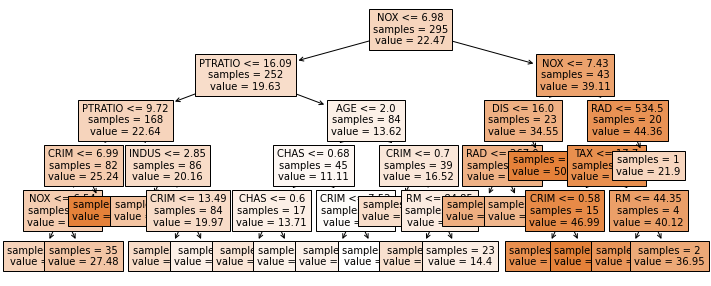

In [210]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo_arbol.get_depth()}")
print(f"Número de nodos terminales: {modelo_arbol.get_n_leaves()}")


plot = plot_tree(
            decision_tree = modelo_arbol,
            feature_names = df.drop(columns = "MEDV").columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

O de otra manera de verlo sería:

[Text(0.58203125, 0.9166666666666666, 'X[4] <= 6.978\nsquared_error = 87.288\nsamples = 295\nvalue = 22.474'),
 Text(0.3359375, 0.75, 'X[10] <= 16.085\nsquared_error = 37.769\nsamples = 252\nvalue = 19.635'),
 Text(0.15625, 0.5833333333333334, 'X[10] <= 9.725\nsquared_error = 20.261\nsamples = 168\nvalue = 22.64'),
 Text(0.09375, 0.4166666666666667, 'X[0] <= 6.988\nsquared_error = 19.738\nsamples = 82\nvalue = 25.243'),
 Text(0.0625, 0.25, 'X[4] <= 6.544\nsquared_error = 12.321\nsamples = 81\nvalue = 24.937'),
 Text(0.03125, 0.08333333333333333, 'squared_error = 6.732\nsamples = 46\nvalue = 23.0'),
 Text(0.09375, 0.08333333333333333, 'squared_error = 8.254\nsamples = 35\nvalue = 27.483'),
 Text(0.125, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 50.0'),
 Text(0.21875, 0.4166666666666667, 'X[2] <= 2.85\nsquared_error = 8.148\nsamples = 86\nvalue = 20.159'),
 Text(0.1875, 0.25, 'squared_error = 2.56\nsamples = 2\nvalue = 28.0'),
 Text(0.25, 0.25, 'X[0] <= 13.494\nsquared_error = 6.78

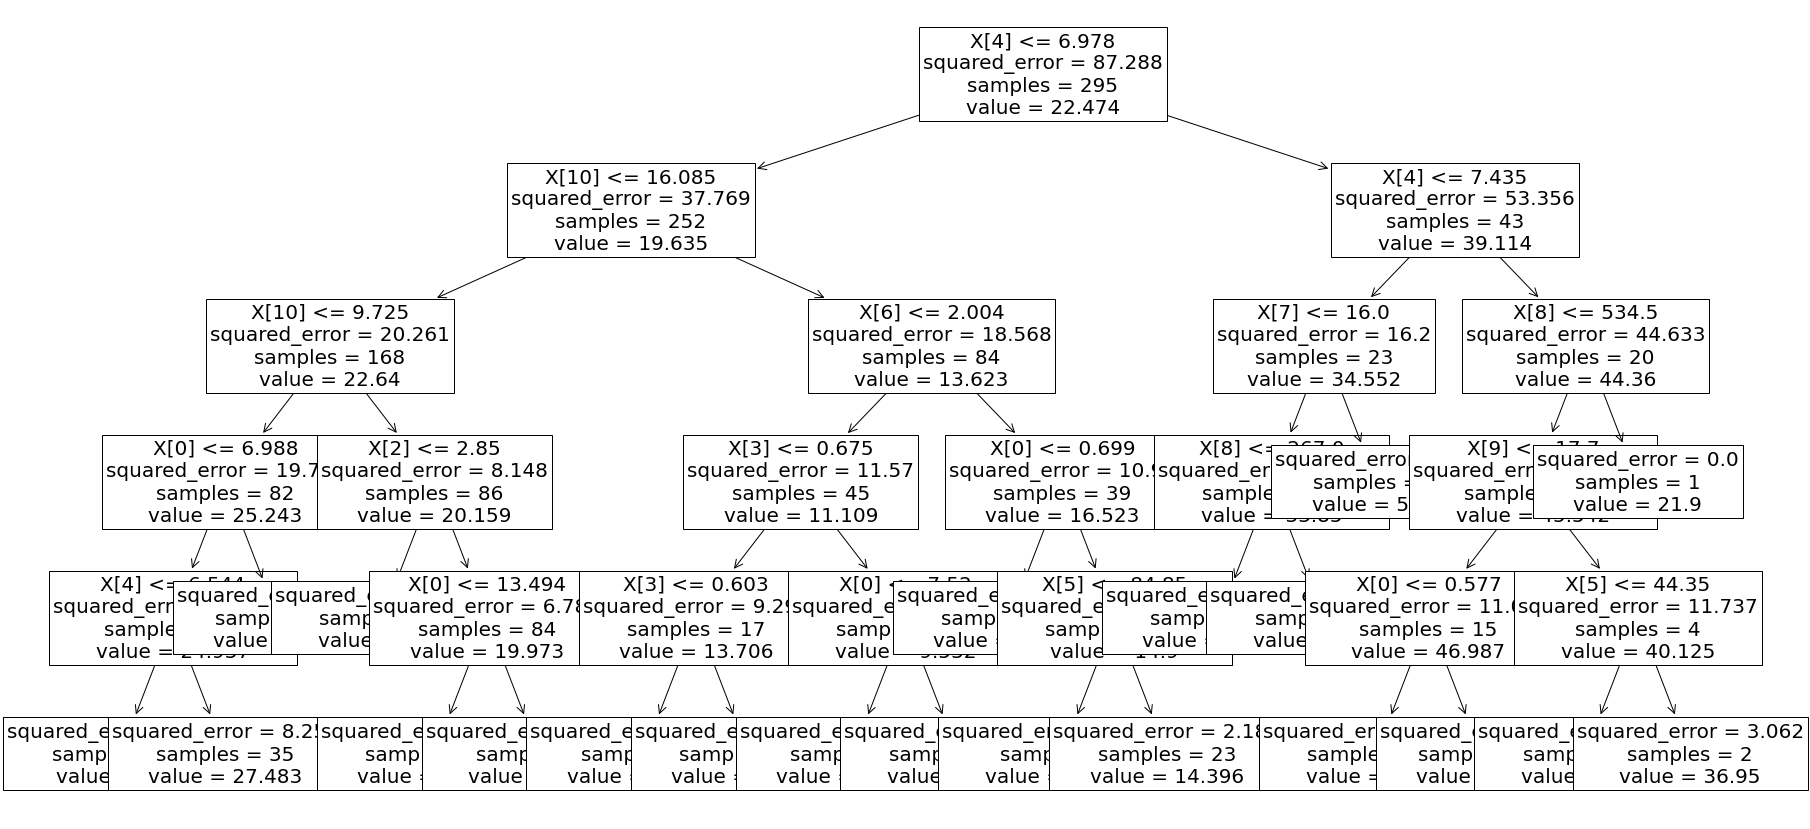

In [211]:
plt.figure(figsize=(30,15))
plot_tree(modelo_arbol,fontsize=20,max_depth=5)

**12. Ahora aplicaremos el método de vecinos más cercanos para regresión. Utilize el KNeighbors regressor de SKLearn para predecir nuestra variable objetivo usando diferentes valores del para el parámetro k. Quédese con el mejor parámetro y mencione su score.**

In [212]:
#Usamos un rango de 1 a 25 para k. El k con mejor score se define:
scores2=[]
for k in range(1,26):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    score2=knn.score(X_test,y_test)
    scores2.append(score2)
    print(score2)
    
tmp2 = max(scores2)
index2 = scores2.index(tmp2) 
print("El k con mayor score es :", index2)

0.35589313636934783
0.635817762401313
0.6401678623169154
0.6076799495978062
0.609422772753176
0.5962540293192946
0.5542284301965931
0.5401495383902443
0.5277712501408462
0.5446098538299613
0.5051526753381326
0.48057508064482113
0.4709568262467789
0.4715670507725406
0.4668857687481144
0.4605976638100512
0.4390108000707308
0.43512120565979884
0.4302793395473382
0.4190478883550608
0.4195633343993648
0.40836031971769693
0.40652285150300704
0.39944720219388186
0.38593427224886623
El k con mayor score es : 2


En k=2 el score es de 63.58%

In [213]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [214]:
print('KneighborsRegressor on training set: {:.4f}'
     .format(neigh.score(X_train, y_train)))
print('KneighborsRegressor on test set: {:.4f}'
     .format(neigh.score(X_test, y_test)))

KneighborsRegressor on training set: 0.8338
KneighborsRegressor on test set: 0.6358


**13. Finalmente, compare los resultados obtenidos con los distintos métodos. ¿Cuál tuvo un mejor desempeño? ¿Cuál tuvo un peor desemempeño? Mencione cualquier otra conclusión que extraiga de estos resultados o de los datos, por ejemplo: ¿por qué
podría haberse comportado mejor un modelo que otro?**

El arbol de decisión frente a KNeighbors regressor de SKLearn, el arbol de decisión dio un mejor score con 84.18% mientras que el score usado para KNeighbors es de 63.58%. Aqui vemos el mejor y peor desempeño, el mejor por medio de arboles de decisión hallando el score mayor para profundidad y número de nodos. Y el peor desempeño con KNeighbors con un k=2.
